In [2]:
import model as m
from sklearn.linear_model import LogisticRegression
clf = m.Classifier(0,LogisticRegression())

In [3]:
#stop word sets specified for this data set
path = "../data/stop_words_imbd/"
with open(path+"stop_words_no_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_no_nums = frozenset(content)
with open(path+"stop_words_with_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_with_nums = frozenset(content)
        

In [9]:
params_trial_1 = { 
            'vect__max_features': (1000,10000),
            'vect__ngram_range': ((1, 1), (1, 2)),
            'vect__max_df':([0.8,1.0]),
            'tfidf__norm': ('l1','l2',None),
            'vect__stop_words' : [None,stop_words_no_nums, stop_words_with_nums],
            'clf__max_iter': ([50,150]), #two extremes
            'clf__solver': ['newton-cg','saga','sag','liblinear'],
            'clf__C':(10,1.0),
            }
#### TEST 1 ####
clf.fit(params_trial_1,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.1s
/Users/kaan/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 53.4min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 83.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 99.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 122.9min
[Parallel(n_j

done in 23428.225s

scores!
mean: 0.852 std: (+/-0.005) for {'clf__C': 10, 'clf__max_iter': 50, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l1', 'vect__max_df': 0.8, 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': None}
mean: 0.854 std: (+/-0.010) for {'clf__C': 10, 'clf__max_iter': 50, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l1', 'vect__max_df': 0.8, 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.854 std: (+/-0.010) for {'clf__C': 10, 'clf__max_iter': 50, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l1', 'vect__max_df': 0.8, 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 2}
mean: 0.841 std: (+/-0.010) for {'clf__C': 10, 'clf__max_iter': 50, 'clf__solver': 'newton-cg', 'tfidf__norm': 'l1', 'vect__max_df': 0.8, 'vect__max_features': 1000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.853 std: (+/-0.009) for {'clf__C': 10, 'clf__max_iter': 50, 'clf__solver': 'newton-cg'

/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Confusion Matrix
[[11164  1337]
 [ 1226 11273]]


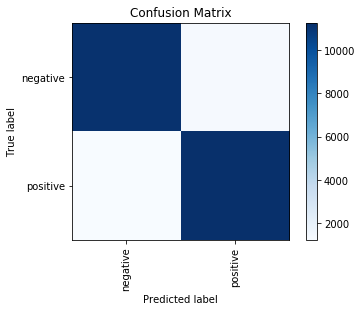

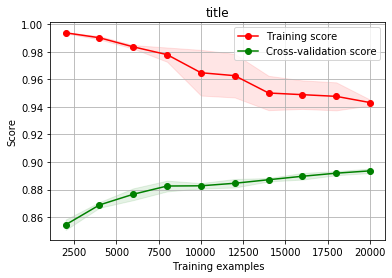

Finding most common params for the top 231 values
[{10: 87, 1.0: 144}, {150: 118, 50: 113}, {'newton-cg': 34, 'sag': 81, 'liblinear': 34, 'saga': 82}, {'l2': 135, None: 96}, {0.8: 115, 1.0: 116}, {10000: 231}, {(1, 2): 119, (1, 1): 112}, {1: 71, 2: 64, None: 96}]


In [11]:
clf.plot_cm([],True)
clf.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf.eval_best_n_params(0.8) #top 30%

In [16]:
clf.eval_best_n_params(0.9) #top 30%

Finding most common params for the top 116 values
[{1.0: 74, 10: 42}, {50: 62, 150: 54}, {'sag': 40, 'newton-cg': 16, 'saga': 44, 'liblinear': 16}, {None: 52, 'l2': 64}, {1.0: 59, 0.8: 57}, {10000: 116}, {(1, 1): 12, (1, 2): 104}, {1: 29, 2: 29, None: 58}]


In [7]:
#0.894 (+/-0.001)
#0.896
params_trial_2 = { 
            'vect__max_features': (10000,100000),
            'vect__ngram_range': ([(1, 2)]),
            'vect__max_df':([0.6,0.8,1.0]),
            'tfidf__use_idf': ([True,False]),
            'vect__stop_words' : [None,stop_words_no_nums, stop_words_with_nums],
            'clf__max_iter': ([50,150]), #two extremes
            'clf__solver': ['saga','sag'],
            'clf__C':(10,1.0),
            }
#### TEST 1 looking at saga ####
clf.fit(params_trial_2,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 60.2min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 79.4min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 102.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 129.1min finished


done in 7767.494s

scores!
mean: 0.888 std: (+/-0.007) for {'clf__C': 10, 'clf__max_iter': 50, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.6, 'vect__max_features': 10000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.887 std: (+/-0.006) for {'clf__C': 10, 'clf__max_iter': 50, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.6, 'vect__max_features': 10000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 1}
mean: 0.886 std: (+/-0.007) for {'clf__C': 10, 'clf__max_iter': 50, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.6, 'vect__max_features': 10000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 2}
mean: 0.904 std: (+/-0.006) for {'clf__C': 10, 'clf__max_iter': 50, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.6, 'vect__max_features': 100000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.901 std: (+/-0.008) for {'clf__C': 10, 'clf__max_iter': 50, 'clf__solver': 'saga', 'tfidf_

/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Confusion Matrix
[[11288  1213]
 [ 1276 11223]]


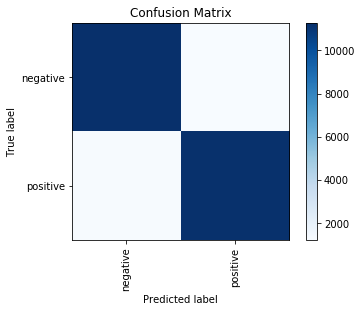

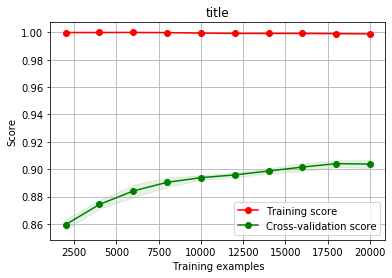

Finding most common params for the top 58 values
[{10: 46, 1.0: 12}, {150: 30, 50: 28}, {'saga': 29, 'sag': 29}, {False: 10, True: 48}, {0.8: 21, 1.0: 17, 0.6: 20}, {100000: 58}, {(1, 2): 58}, {2: 14, None: 32, 1: 12}]


In [8]:
clf.plot_cm([],True)
clf.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf.eval_best_n_params(0.8) #top 30%

In [12]:
clf.eval_best_n_params(0.90) #top 30%

Finding most common params for the top 29 values
[{10: 29}, {150: 14, 50: 15}, {'sag': 15, 'saga': 14}, {True: 29}, {1.0: 11, 0.6: 7, 0.8: 11}, {100000: 29}, {(1, 2): 29}, {1: 6, 2: 11, None: 12}]


In [9]:
sorted(clf.score_dict.keys())

[(0.8618399999999999, 211),
 (0.8618399999999999, 247),
 (0.8618399999999999, 283),
 (0.8619199999999999, 175),
 (0.86348, 178),
 (0.86348, 214),
 (0.86348, 250),
 (0.86348, 286),
 (0.87392, 277),
 (0.87396, 205),
 (0.87396, 241),
 (0.874, 169),
 (0.8756, 163),
 (0.87568, 199),
 (0.87568, 235),
 (0.87568, 271),
 (0.8757999999999999, 172),
 (0.87584, 208),
 (0.8758799999999999, 280),
 (0.87592, 244),
 (0.8772800000000001, 166),
 (0.8772800000000001, 202),
 (0.8772800000000001, 238),
 (0.8772800000000001, 274),
 (0.87768, 252),
 (0.8777200000000001, 174),
 (0.8777200000000001, 210),
 (0.8777200000000001, 216),
 (0.8777200000000001, 246),
 (0.8777200000000001, 282),
 (0.8777200000000001, 288),
 (0.87776, 180),
 (0.8778, 201),
 (0.8778, 237),
 (0.8778, 273),
 (0.87784, 207),
 (0.87784, 209),
 (0.87784, 215),
 (0.87784, 245),
 (0.87784, 281),
 (0.87784, 287),
 (0.8778400000000002, 165),
 (0.8778400000000002, 177),
 (0.8778400000000002, 279),
 (0.87788, 173),
 (0.87788, 179),
 (0.87788, 213)

In [14]:
#0.9037599999999999 (+/-0.010)
#0.896
params_trial_3 = { 
            'vect__max_features': (50000,100000,150000),
            'vect__ngram_range': ([(1, 2)]),
            'vect__max_df':([0.55,0.6,0.65,0.7,0.8]),
            'tfidf__use_idf': ([True]),
            'vect__stop_words' : [None],
            'clf__max_iter': ([100]), #two extremes
            'clf__solver': ['saga'],
            'clf__C':([10,8]),
            }
#### TEST 1 looking at saga ####
clf.fit(params_trial_3,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 20.3min finished


done in 1239.742s

scores!
mean: 0.901 std: (+/-0.004) for {'clf__C': 10, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.55, 'vect__max_features': 50000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.904 std: (+/-0.007) for {'clf__C': 10, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.55, 'vect__max_features': 100000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.905 std: (+/-0.005) for {'clf__C': 10, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.55, 'vect__max_features': 150000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.901 std: (+/-0.005) for {'clf__C': 10, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.6, 'vect__max_features': 50000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.904 std: (+/-0.006) for {'clf__C': 10, 'clf__max_iter': 100, 'clf__solver': 

Confusion Matrix
[[11304  1197]
 [ 1243 11256]]


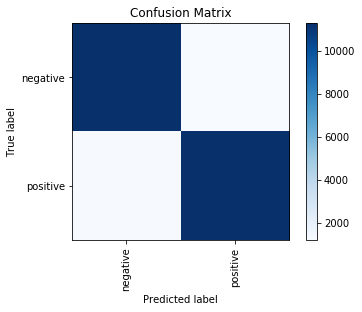

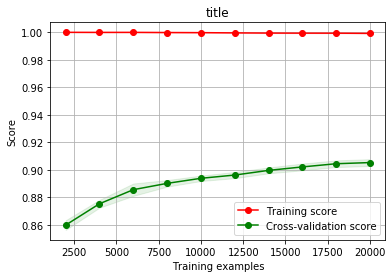

Finding most common params for the top 6 values
[{8: 2, 10: 4}, {100: 6}, {'saga': 6}, {True: 6}, {0.8: 2, 0.55: 2, 0.65: 1, 0.7: 1}, {150000: 6}, {(1, 2): 6}, {None: 6}]


[(0.9007999999999999, 19),
 (0.90084, 13),
 (0.9008800000000001, 22),
 (0.9010399999999998, 25),
 (0.90108, 7),
 (0.9012, 4),
 (0.9012, 28),
 (0.9012399999999999, 1),
 (0.9015600000000001, 10),
 (0.9018, 16),
 (0.90312, 29),
 (0.9033599999999999, 26),
 (0.90352, 8),
 (0.90352, 11),
 (0.9036399999999999, 14),
 (0.9036799999999999, 5),
 (0.9037600000000001, 23),
 (0.9039999999999999, 20),
 (0.90404, 24),
 (0.9040800000000001, 2),
 (0.9042, 27),
 (0.9042399999999999, 21),
 (0.9043999999999999, 6),
 (0.9044000000000001, 17),
 (0.9044399999999999, 30),
 (0.9044800000000001, 15),
 (0.90452, 18),
 (0.9046, 9),
 (0.9048399999999999, 12),
 (0.9053599999999999, 3)]

In [15]:
clf.plot_cm([],True)
clf.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf.eval_best_n_params(0.8) #top 30%
sorted(clf.score_dict.keys())

In [19]:
clf.eval_best_n_params(0.9) #top 30%


Finding most common params for the top 3 values
[{10: 3}, {100: 3}, {'saga': 3}, {True: 3}, {0.65: 1, 0.7: 1, 0.55: 1}, {150000: 3}, {(1, 2): 3}, {None: 3}]


In [21]:
#0.905 (+/-0.006)
#0.896
params_trial_3 = { 
            'vect__max_features': (125000,150000,225000),
            'vect__ngram_range': ([(1, 2)]),
            'vect__max_df':([0.45,0.55,0.65]),
            'tfidf__use_idf': ([True]),
            'vect__stop_words' : [None],
            'clf__max_iter': ([100]), #two extremes
            'clf__solver': ['saga'],
            'clf__C':([11,10,9]),
            }
#### TEST 1 looking at saga ####
clf.fit(params_trial_3,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 17.0min finished


done in 1045.539s

scores!
mean: 0.905 std: (+/-0.006) for {'clf__C': 11, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.45, 'vect__max_features': 125000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.905 std: (+/-0.007) for {'clf__C': 11, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.45, 'vect__max_features': 150000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.006) for {'clf__C': 11, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.45, 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.905 std: (+/-0.006) for {'clf__C': 11, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.55, 'vect__max_features': 125000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.905 std: (+/-0.006) for {'clf__C': 11, 'clf__max_iter': 100, 'clf__solver

Confusion Matrix
[[11307  1194]
 [ 1231 11268]]


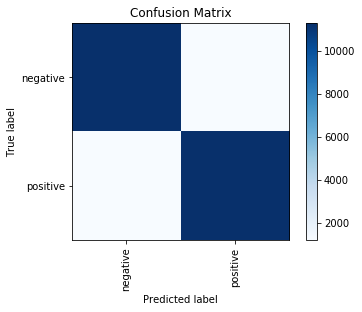

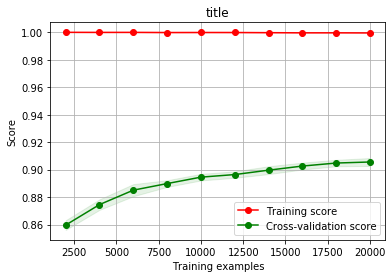

Finding most common params for the top 6 values
[{11: 4, 10: 2}, {100: 6}, {'saga': 6}, {True: 6}, {0.45: 4, 0.55: 2}, {150000: 3, 125000: 1, 225000: 2}, {(1, 2): 6}, {None: 6}]


[(0.9036799999999999, 27),
 (0.9039200000000001, 7),
 (0.9039200000000001, 25),
 (0.9040800000000001, 16),
 (0.9041599999999999, 24),
 (0.9041600000000001, 18),
 (0.9042, 15),
 (0.90432, 26),
 (0.9044800000000001, 9),
 (0.90456, 20),
 (0.9046, 17),
 (0.90464, 4),
 (0.90464, 8),
 (0.9046800000000002, 21),
 (0.9047599999999999, 11),
 (0.9047600000000001, 19),
 (0.9047999999999998, 6),
 (0.9048400000000001, 13),
 (0.90488, 22),
 (0.90488, 23),
 (0.9051600000000001, 10),
 (0.9052000000000001, 2),
 (0.90524, 1),
 (0.90532, 5),
 (0.90532, 12),
 (0.90532, 14),
 (0.9056, 3)]

In [22]:
clf.plot_cm([],True)
clf.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf.eval_best_n_params(0.8) #top 30%
sorted(clf.score_dict.keys())

In [24]:
clf.eval_best_n_params(0.95) #top 30%
sorted(clf.score_dict.keys())

Finding most common params for the top 2 values
[{10: 1, 11: 1}, {100: 2}, {'saga': 2}, {True: 2}, {0.55: 1, 0.45: 1}, {150000: 1, 225000: 1}, {(1, 2): 2}, {None: 2}]


[(0.9036799999999999, 27),
 (0.9039200000000001, 7),
 (0.9039200000000001, 25),
 (0.9040800000000001, 16),
 (0.9041599999999999, 24),
 (0.9041600000000001, 18),
 (0.9042, 15),
 (0.90432, 26),
 (0.9044800000000001, 9),
 (0.90456, 20),
 (0.9046, 17),
 (0.90464, 4),
 (0.90464, 8),
 (0.9046800000000002, 21),
 (0.9047599999999999, 11),
 (0.9047600000000001, 19),
 (0.9047999999999998, 6),
 (0.9048400000000001, 13),
 (0.90488, 22),
 (0.90488, 23),
 (0.9051600000000001, 10),
 (0.9052000000000001, 2),
 (0.90524, 1),
 (0.90532, 5),
 (0.90532, 12),
 (0.90532, 14),
 (0.9056, 3)]

In [25]:
#0.9056 (+/-0.005)
#0.896
params_trial_4 = { 
            'vect__max_features': (200000,225000,250000),
            'vect__ngram_range': ([(1, 2)]),
            'vect__max_df':([0.4,0.45,0.5]),
            'tfidf__use_idf': ([True]),
            'vect__stop_words' : [None],
            'clf__max_iter': ([100]), 
            'clf__solver': ['saga'],
            'clf__C':([11.5,11,10.5]),
            }
#### TEST 1 looking at saga ####
clf.fit(params_trial_4,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 18.0min finished


done in 1106.320s

scores!
mean: 0.906 std: (+/-0.006) for {'clf__C': 11.5, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.4, 'vect__max_features': 200000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.005) for {'clf__C': 11.5, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.4, 'vect__max_features': 225000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.004) for {'clf__C': 11.5, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.4, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.905 std: (+/-0.006) for {'clf__C': 11.5, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.45, 'vect__max_features': 200000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.006) for {'clf__C': 11.5, 'clf__max_iter': 100, 'clf_

Confusion Matrix
[[11310  1191]
 [ 1235 11264]]


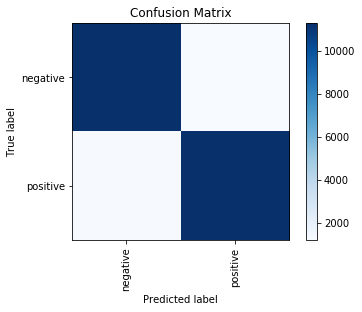

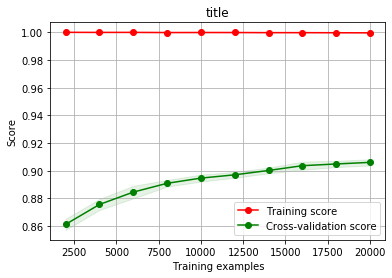

Finding most common params for the top 6 values
[{10.5: 2, 11.5: 2, 11: 2}, {100: 6}, {'saga': 6}, {True: 6}, {0.4: 6}, {200000: 3, 250000: 3}, {(1, 2): 6}, {None: 6}]


[(0.905, 18),
 (0.905, 22),
 (0.905, 27),
 (0.9050800000000001, 9),
 (0.9050800000000001, 13),
 (0.9051600000000001, 4),
 (0.9051600000000001, 24),
 (0.9052, 26),
 (0.90532, 17),
 (0.9053599999999999, 15),
 (0.9054, 6),
 (0.9054800000000001, 23),
 (0.90556, 14),
 (0.9056, 8),
 (0.90568, 5),
 (0.90572, 16),
 (0.9057599999999999, 20),
 (0.9057599999999999, 25),
 (0.9058400000000001, 2),
 (0.9058400000000001, 7),
 (0.9058400000000001, 11),
 (0.9058400000000001, 19),
 (0.90588, 1),
 (0.90596, 10),
 (0.906, 12),
 (0.90604, 3),
 (0.90604, 21)]

In [26]:
clf.plot_cm([],True)
clf.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf.eval_best_n_params(0.8) #top 30%
sorted(clf.score_dict.keys())

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  8.6min remaining:   17.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.7min finished


done in 547.622s

scores!
mean: 0.906 std: (+/-0.005) for {'clf__C': 13, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.35, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.004) for {'clf__C': 13, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.35, 'vect__max_features': 300000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.004) for {'clf__C': 13, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.4, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.004) for {'clf__C': 13, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.4, 'vect__max_features': 300000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.005) for {'clf__C': 13, 'clf__max_iter': 100, 'clf__solver': 

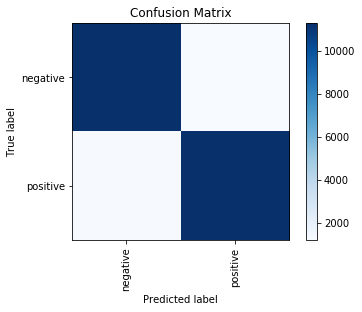

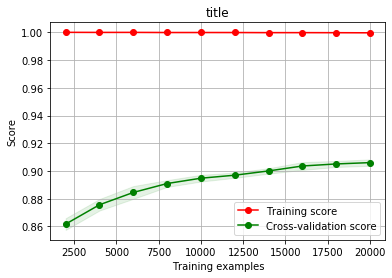

Finding most common params for the top 3 values
[{12: 2, 13: 1}, {100: 3}, {'saga': 3}, {True: 3}, {0.4: 3}, {300000: 1, 250000: 2}, {(1, 2): 3}, {None: 3}]


[(0.9052, 12),
 (0.90556, 5),
 (0.90556, 6),
 (0.90556, 11),
 (0.9056, 8),
 (0.9057999999999999, 7),
 (0.90588, 1),
 (0.906, 2),
 (0.906, 4),
 (0.906, 10),
 (0.90608, 3),
 (0.9061199999999999, 9)]

In [27]:
#0.90604 (+/-0.005)
params_trial_5 = { 
            'vect__max_features': (250000,300000),
            'vect__ngram_range': ([(1, 2)]),
            'vect__max_df':([0.35,0.4,0.45]),
            'tfidf__use_idf': ([True]),
            'vect__stop_words' : [None],
            'clf__max_iter': ([100]), 
            'clf__solver': ['saga'],
            'clf__C':([13,12]),
            }
#### TEST 1 looking at saga ####
clf.fit(params_trial_5,5)
clf.plot_cm([],True)
clf.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf.eval_best_n_params(0.8) #top 30%
sorted(clf.score_dict.keys())

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:  3.5min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.3min finished


done in 286.490s

scores!
mean: 0.906 std: (+/-0.004) for {'clf__C': 12.5, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.38, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.004) for {'clf__C': 12.5, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.4, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.006) for {'clf__C': 12.5, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.42, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.005) for {'clf__C': 11.5, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.38, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.004) for {'clf__C': 11.5, 'clf__max_iter': 100, 'clf

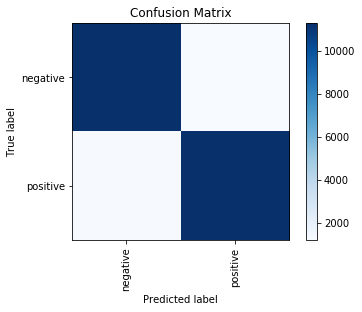

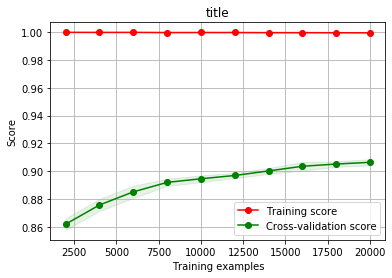

Finding most common params for the top 2 values
[{12.5: 1, 11.5: 1}, {100: 2}, {'saga': 2}, {True: 2}, {0.38: 2}, {250000: 2}, {(1, 2): 2}, {None: 2}]


[(0.90604, 6),
 (0.9060400000000002, 5),
 (0.90608, 2),
 (0.9061600000000001, 3),
 (0.90632, 1),
 (0.9063599999999999, 4)]

In [30]:
#0.9061199999999999 (+/-0.006)

params_trial_6 = { 
            'vect__max_features': ([250000]),
            'vect__ngram_range': ([(1, 2)]),
            'vect__max_df':([0.38,0.4,0.42]),
            'tfidf__use_idf': ([True]),
            'vect__stop_words' : [None],
            'clf__max_iter': ([100]), 
            'clf__solver': ['saga'],
            'clf__C':([12.5,11.5]),
            }
#### TEST 1 looking at saga ####
clf.fit(params_trial_6,5)
clf.plot_cm([],True)
clf.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf.eval_best_n_params(0.8) #top 30%
sorted(clf.score_dict.keys())

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:  3.4min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.2min finished


done in 278.745s

scores!
mean: 0.906 std: (+/-0.004) for {'clf__C': 11.75, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.36, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.005) for {'clf__C': 11.75, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.37, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.004) for {'clf__C': 11.75, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.39, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.004) for {'clf__C': 12, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.36, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.005) for {'clf__C': 12, 'clf__max_iter': 100, 'clf

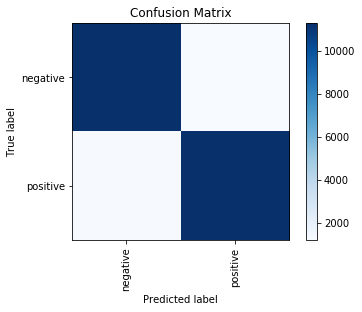

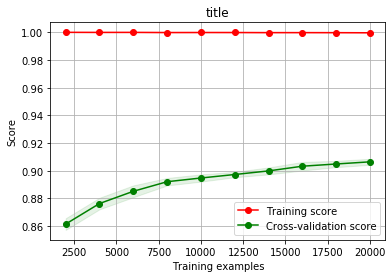

Finding most common params for the top 2 values
[{12: 2}, {100: 2}, {'saga': 2}, {True: 2}, {0.37: 1, 0.36: 1}, {250000: 2}, {(1, 2): 2}, {None: 2}]


[(0.90604, 6),
 (0.9062000000000001, 3),
 (0.9062800000000001, 1),
 (0.90648, 2),
 (0.90648, 5),
 (0.9064800000000002, 4)]

In [33]:
#0.9063599999999999 (+/-0.005)
params_trial_6 = { 
            'vect__max_features': ([250000]),
            'vect__ngram_range': ([(1, 2)]),
            'vect__max_df':([0.36,0.37,0.39]),
            'tfidf__use_idf': ([True]),
            'vect__stop_words' : [None],
            'clf__max_iter': ([100]), 
            'clf__solver': ['saga'],
            'clf__C':([11.75,12]),
            }
#### TEST 1 looking at saga ####
clf.fit(params_trial_6,5)
clf.plot_cm([],True)
clf.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf.eval_best_n_params(0.8) #top 30%
sorted(clf.score_dict.keys())

In [34]:
clf.eval_best_n_params(0.9) #top 30%

Finding most common params for the top 1 values
[{12: 1}, {100: 1}, {'saga': 1}, {True: 1}, {0.36: 1}, {250000: 1}, {(1, 2): 1}, {None: 1}]


Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  2.3min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  2.3min remaining:   45.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.9min finished


done in 198.938s

scores!
mean: 0.906 std: (+/-0.005) for {'clf__C': 12.25, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.34, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.004) for {'clf__C': 12.25, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.36, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.906 std: (+/-0.005) for {'clf__C': 12, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.34, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.907 std: (+/-0.004) for {'clf__C': 12, 'clf__max_iter': 100, 'clf__solver': 'saga', 'tfidf__use_idf': True, 'vect__max_df': 0.36, 'vect__max_features': 250000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
Best score:
0.907 (+/-0.004)
with parameters set:
	clf__C: 12
	clf__max_iter

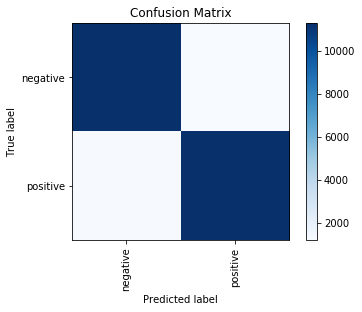

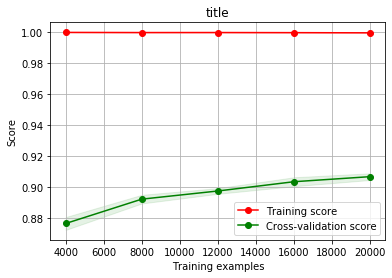

Finding most common params for the top 1 values
[{12: 1}, {100: 1}, {'saga': 1}, {True: 1}, {0.36: 1}, {250000: 1}, {(1, 2): 1}, {None: 1}]


[(0.90596, 1), (0.90604, 3), (0.9064400000000001, 2), (0.90656, 4)]

In [35]:
#0.9064800000000002 (+/-0.005)
# we still seem to be improving incrementally
params_trial_7 = { 
            'vect__max_features': ([250000]),
            'vect__ngram_range': ([(1, 2)]),
            'vect__max_df':([0.34,0.36]),
            'tfidf__use_idf': ([True]),
            'vect__stop_words' : [None],
            'clf__max_iter': ([100]), 
            'clf__solver': ['saga'],
            'clf__C':([12.25,12]),
            }
#### TEST 1 looking at saga ####
clf.fit(params_trial_7,5)
clf.plot_cm([],True)
clf.learning_curve([0.2,0.4,0.6,0.8,1.0])
clf.eval_best_n_params(0.8) #top 30%
sorted(clf.score_dict.keys())

Evaluation on test set:

Accuracy Score : 0.9024
Precision Score : 0.9024
Recall Score : 0.9024
F1 Score : 0.9024
Confusion Matrix
[[11301  1200]
 [ 1240 11259]]
Confusion Matrix
[[0.90400768 0.09599232]
 [0.09920794 0.90079206]]


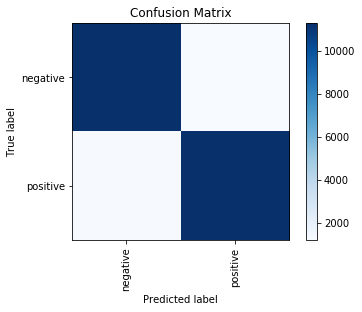

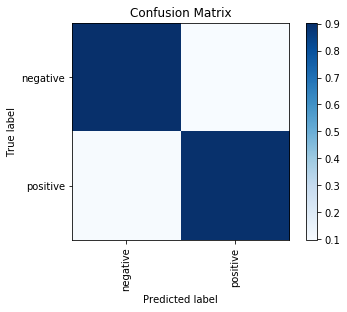

In [39]:
#0.907 (+/-0.004)
#THIS IS  OUR BEST SCORE a good improvment from 0.894 beating the T.A score
clf.eval_on_test( [("Confusion Matrix",None),("Confusion Matrix",'true')],True)